# Random Forest Test with Well-being

In [2]:
%pwd

'/mnt/f/ESG09_Project/Code'

In [3]:
%cd ..

/mnt/f/ESG09_Project


/home/zhang/miniconda3/envs/tf/lib/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


## Import Package

In [4]:
import matplotlib.pyplot as plt
import os 
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [5]:
!pip install seaborn

## Basic with the most variable

### Load and Make Data

In [6]:
RawDataset_Filename = os.path.join("Data", "GallupWB_WashedRawData17Wave_v1.parquet")

In [7]:
RawDataset = pd.read_parquet(RawDataset_Filename)

In [8]:
RawDataset.shape

(2594089, 90)

In [9]:
nan_counts = RawDataset.isna().sum()
for line in zip(RawDataset.columns, nan_counts):
    print(line)

('wave', 0)
('COUNTRY_ISO3', 0)
('INCOME_1', 420409)
('INCOME_2', 423416)
('INCOME_3', 420411)
('INCOME_4', 423418)
('INCOME_5', 419801)
('INCOME_6', 2594089)
('INCOME_7', 419841)
('WP16', 14604)
('WP18', 14603)
('WP23', 123903)
('WP27', 151900)
('WP30', 129145)
('WP31', 142727)
('WP40', 52441)
('WP43', 49598)
('WP60', 86371)
('WP61', 67376)
('WP63', 104399)
('WP65', 69390)
('WP67', 74033)
('WP68', 85721)
('WP69', 82693)
('WP70', 83895)
('WP71', 184749)
('WP74', 100720)
('WP83', 185474)
('WP85', 310161)
('WP86', 240808)
('WP19472', 1719188)
('WP88', 262622)
('WP89', 171021)
('WP91', 198859)
('WP92', 200973)
('WP93', 145248)
('WP94', 202990)
('WP95', 201667)
('WP96', 2594089)
('WP97', 238617)
('WP98', 231858)
('WP10248', 710990)
('WP103', 452880)
('WP105', 545368)
('WP106', 262574)
('WP108', 189759)
('WP109', 187253)
('WP110', 193819)
('WP111', 675056)
('WP112', 419460)
('WP113', 206175)
('WP117', 268482)
('WP118', 786324)
('WP119', 291689)
('WP129', 177618)
('WP130', 156114)
('WP9050',

In [10]:
nan_counts = RawDataset.isna().sum()
name_list = []
for line in zip(RawDataset.columns, nan_counts):
    if line[1] < 500_000:
        name_list.append(line[0])
        print(line)

('wave', 0)
('COUNTRY_ISO3', 0)
('INCOME_1', 420409)
('INCOME_2', 423416)
('INCOME_3', 420411)
('INCOME_4', 423418)
('INCOME_5', 419801)
('INCOME_7', 419841)
('WP16', 14604)
('WP18', 14603)
('WP23', 123903)
('WP27', 151900)
('WP30', 129145)
('WP31', 142727)
('WP40', 52441)
('WP43', 49598)
('WP60', 86371)
('WP61', 67376)
('WP63', 104399)
('WP65', 69390)
('WP67', 74033)
('WP68', 85721)
('WP69', 82693)
('WP70', 83895)
('WP71', 184749)
('WP74', 100720)
('WP83', 185474)
('WP85', 310161)
('WP86', 240808)
('WP88', 262622)
('WP89', 171021)
('WP91', 198859)
('WP92', 200973)
('WP93', 145248)
('WP94', 202990)
('WP95', 201667)
('WP97', 238617)
('WP98', 231858)
('WP103', 452880)
('WP106', 262574)
('WP108', 189759)
('WP109', 187253)
('WP110', 193819)
('WP112', 419460)
('WP113', 206175)
('WP117', 268482)
('WP119', 291689)
('WP129', 177618)
('WP130', 156114)
('WP131', 408916)
('WP132', 218748)
('WP134', 162829)
('WP138', 392723)
('WP139', 426999)
('WP141', 240493)
('WP144', 461870)
('WP145', 294340)
(

In [11]:
name_list = []
for line in zip(RawDataset.columns, nan_counts):
    if line[1] < 200_000:
        name_list.append(line[0])
        print(line)

('wave', 0)
('COUNTRY_ISO3', 0)
('WP16', 14604)
('WP18', 14603)
('WP23', 123903)
('WP27', 151900)
('WP30', 129145)
('WP31', 142727)
('WP40', 52441)
('WP43', 49598)
('WP60', 86371)
('WP61', 67376)
('WP63', 104399)
('WP65', 69390)
('WP67', 74033)
('WP68', 85721)
('WP69', 82693)
('WP70', 83895)
('WP71', 184749)
('WP74', 100720)
('WP83', 185474)
('WP89', 171021)
('WP91', 198859)
('WP93', 145248)
('WP108', 189759)
('WP109', 187253)
('WP110', 193819)
('WP129', 177618)
('WP130', 156114)
('WP134', 162829)
('WP1219', 22)
('WP1220', 3306)
('WP1223', 26119)
('WP1230', 80157)
('WP2319', 146446)
('WP3117', 77184)


In [12]:
name_list = name_list + ['INCOME_2']

In [13]:
FineWashedDf = RawDataset[name_list]

In [14]:
FineWashedDf.shape

(2594089, 37)

In [15]:
FineWashedDf.dropna(inplace=True)

/tmp/ipykernel_22333/2069073635.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FineWashedDf.dropna(inplace=True)


In [16]:
FineWashedDf.shape

(1786480, 37)

### Train and Test df

In [17]:
FineWashedDf = FineWashedDf.sample(frac=1, random_state=42).reset_index(drop=True)

In [18]:
FineWashedDf['COUNTRY_ISO3'] = FineWashedDf['COUNTRY_ISO3'].astype('category')

In [19]:
FineWashedDf.head()

,wave,COUNTRY_ISO3,WP16,WP18,WP23,WP27,WP30,WP31,WP40,WP43,...,WP129,WP130,WP134,WP1219,WP1220,WP1223,WP1230,WP2319,WP3117,INCOME_2
0,4.0,SLV,6.0,7.0,2.0,1.0,1.0,1.0,2.0,1.0,...,1.0,1.0,1.0,1.0,28.0,8.0,1.0,4.0,1.0,2060.323089
1,15.1,THA,0.0,0.0,2.0,1.0,2.0,3.0,1.0,2.0,...,1.0,1.0,1.0,1.0,45.0,8.0,0.0,4.0,1.0,4506.659275
2,8.1,PSE,5.0,6.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,2.0,2.0,1.0,35.0,2.0,4.0,2.0,2.0,14539.335197
3,11.1,MKD,5.0,8.0,2.0,1.0,2.0,4.0,2.0,2.0,...,1.0,1.0,1.0,1.0,32.0,2.0,1.0,2.0,3.0,19596.924107
4,10.1,CZE,9.0,9.0,2.0,1.0,1.0,1.0,2.0,1.0,...,1.0,1.0,1.0,2.0,46.0,2.0,0.0,1.0,2.0,42387.733484


In [20]:
y = FineWashedDf['WP16']

In [21]:
X = FineWashedDf.drop(columns=['WP16', 'WP18'])

In [22]:
X.shape

(1786480, 35)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

### Clear Memory

In [24]:
RawDataset = None

In [25]:
FineWashedDf = None

In [26]:
X = None

In [27]:
y = None

### Analysis Test XGBoost

In [ ]:
for i in range(10):
    model = xgb.XGBRegressor(objective='reg:squarederror', device = 'cuda', tree_method='hist', n_estimators=500, learning_rate=0.01, max_depth=20, random_state=42, enable_categorical=True  )
    model.fit(X_train, y_train)

In [54]:
y_pred = model.predict(X_test)

In [55]:
r2_score(y_test, y_pred) * 100

0.475639019188312

In [56]:
y_pred = model.predict(X_train)

In [57]:
r2_score(y_train, y_pred) * 100

99.99750353180168

## Fine Wash

### Load Dataset

In [4]:
RawDataset_Filename = os.path.join("Data", "GallupWB_WashedRawData17Wave_v1.parquet")

In [5]:
RawDataset = pd.read_parquet(RawDataset_Filename)

In [6]:
RawDataset.shape

(2594089, 90)

In [7]:
nan_counts = RawDataset.isna().sum()
for line in zip(RawDataset.columns, nan_counts):
    print(line)

('wave', 0)
('COUNTRY_ISO3', 0)
('INCOME_1', 420409)
('INCOME_2', 423416)
('INCOME_3', 420411)
('INCOME_4', 423418)
('INCOME_5', 419801)
('INCOME_6', 2594089)
('INCOME_7', 419841)
('WP16', 14604)
('WP18', 14603)
('WP23', 123903)
('WP27', 151900)
('WP30', 129145)
('WP31', 142727)
('WP40', 52441)
('WP43', 49598)
('WP60', 86371)
('WP61', 67376)
('WP63', 104399)
('WP65', 69390)
('WP67', 74033)
('WP68', 85721)
('WP69', 82693)
('WP70', 83895)
('WP71', 184749)
('WP74', 100720)
('WP83', 185474)
('WP85', 310161)
('WP86', 240808)
('WP19472', 1719188)
('WP88', 262622)
('WP89', 171021)
('WP91', 198859)
('WP92', 200973)
('WP93', 145248)
('WP94', 202990)
('WP95', 201667)
('WP96', 2594089)
('WP97', 238617)
('WP98', 231858)
('WP10248', 710990)
('WP103', 452880)
('WP105', 545368)
('WP106', 262574)
('WP108', 189759)
('WP109', 187253)
('WP110', 193819)
('WP111', 675056)
('WP112', 419460)
('WP113', 206175)
('WP117', 268482)
('WP118', 786324)
('WP119', 291689)
('WP129', 177618)
('WP130', 156114)
('WP9050',

### wave

In [65]:
RawDataset['wave'].value_counts().sort_index()

wave
1.0     129972
2.0     104831
3.0     120443
3.1       3568
3.2       4141
3.3       2592
3.4       1758
4.0      99664
4.1      18074
4.2      19164
4.3       1147
5.0     112702
5.1      18141
5.2      20013
6.0     130614
6.1      23134
6.2      26258
6.3       7224
6.4       7157
6.5       1077
7.1     151720
7.2      49465
7.3      12879
7.4      16019
8.1     138673
9.1     154205
9.2      36143
10.1    148232
11.1    148724
11.2      2000
12.1    154166
12.9      1000
13.1    118922
13.2     33952
14.1    176253
15.1    121207
15.5      6350
15.9      1917
16.1    126902
17.1    143686
Name: count, dtype: int64

In [66]:
RawDataset['wave'] = RawDataset['wave'].astype(int)

In [67]:
RawDataset['wave'].value_counts().sort_index()

wave
1     129972
2     104831
3     132502
4     138049
5     150856
6     195464
7     230083
8     138673
9     190348
10    148232
11    150724
12    155166
13    152874
14    176253
15    129474
16    126902
17    143686
Name: count, dtype: int64

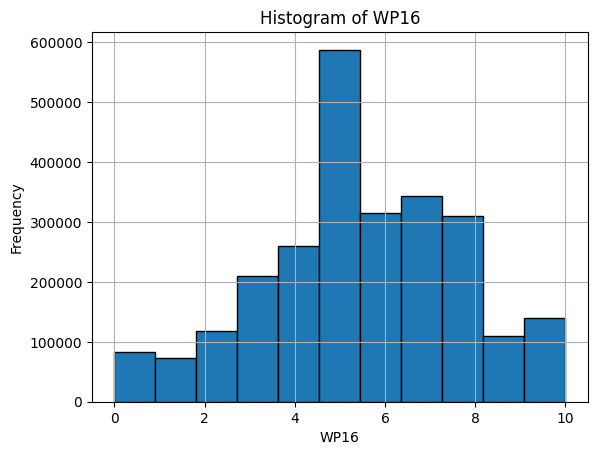

In [17]:
plt.hist(RawDataset['WP16'], bins=11, range=(0, 10), edgecolor='black')
plt.title('Histogram of WP16')
plt.xlabel('WP16')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()